# Jupyter Notebook的配置
+ tags: python, jupyter, conf
+ date: 2016-11-01
+ slug: jupyter-conf

## 默认目录
```sh
jupyter notebook --generate-config
vim /home/zpj/.jupyter/jupyter_notebook_config.py#查找dir设定notebook根目录
```

找到`c.NotebookApp.notebook_dir`条目，修改为启动jupyter后打开的目录，如`/home/zpj/code`

## 配置pylab, matplotlib默认载入
导入库，内联svg输出，需要运行：

In [2]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


### 配置ipython
创建配置文件，并且编辑：
```sh
ipython profile create
cd ~/.ipython/profile_default
vim ipython_config.py
```

编辑为
```py
c.InteractiveShellApp.pylab = "inline"
c.InlineBackend.figure_formats = ['svg']
c.InteractiveShellApp.pylab_import_all = True
```

## matplotlib中文
matplotlib似乎只能使用`.ttf`格式的字体
```sh
$ fc-list :lang=zh|grep ttf#产生可用字体列表
...
/usr/share/fonts/truetype/DroidSansFallbackFull.ttf: Droid Sans Fallback:style=Regular
...
```

设置为Droid Sans Fallback是中庸的选择，运行以下脚本：

```sh
file="/usr/lib64/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc"
if [ -f $file ]
then
  sed -i "s/#*\(font.sans-serif *:\).*/\1 Droid Sans Fallback/g" $file
  echo "matplotlibrc found and font is configured"
else
  echo "$file not found!"
  echo "Please run locate matplotlibrc to find similiar file locattion"
fi
```

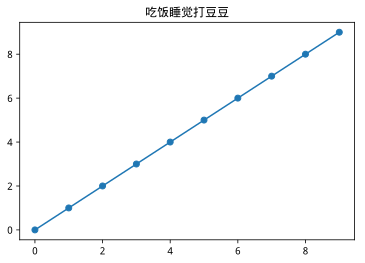

In [1]:
plot(arange(10),'o-')
title('吃饭睡觉打豆豆')

## 本地LM Roman字体
参见http://stackoverflow.com/a/42446768 命令：
```sh
FROM=/usr/share/javascript/mathjax
NB=/usr/lib/python3.6/site-packages/notebook
TO=$NB/static/components/MathJax
JS=$NB/static/notebook/js/main.min.js
DIR1=fonts/HTML-CSS/TeX
DIR2=jax/output/HTML-CSS/fonts/TeX
sudo ln -s $FROM/$DIR1 $TO/$DIR1
sudo ln -s $FROM/$DIR2 $TO/$DIR2
sudo sed -i 's/\(availableFonts:\).*/\1 \["STIX-Web", "TeX"\]/g' $JS
```

最后一句替换`availableFonts`段为`["STIX-Web","TeX"]`

## Userstyle for jupyter
Install stylish, and then install [Jupyter Serif Font & Code Block Background](https://userstyles.org/styles/142934/jupyter-serif-font-and-code-block-background) style. 